# Using ARIS maps as input.

One of the fundamental building blocks of `TiEMPO2` is the atmospheric screen generated by ARIS. Using this screen, we calculate the PWV values, as function of time and position on the sky. In this notebook, we play around a bit with a map included with `TiEMPO2`. 

In [1]:
import os
import numpy as np
import tiempo2.Atmosphere as TAtm
from IPython.display import HTML

import matplotlib.pyplot as pt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.animation as animation


%matplotlib inline
TAtm.readAtmTransmission()
atmosphereDict = {
    "filename" : "test",
    "path" : os.path.join("..", "..", "tests", "resources"),
    "PWV0" : 1.}

telescopeDict = {
    "Dtel" : 10
}

pwvgrid = 0.2 
max_windspeed = 10 
h_column = 1000

PWV, nx, ny = TAtm.generateAtmospherePWV(atmosphereDict, telescopeDict)

L_tot_screen = ny * pwvgrid

X, Y = np.mgrid[0:ny:ny * 1j, 0:ny:ny* 1j]

X *= pwvgrid
Y *= pwvgrid

#Convert X and Y to angles on-sky
X = np.degrees(np.arctan((X - L_tot_screen / 2) / h_column))
Y = np.degrees(np.arctan((Y - L_tot_screen / 2) / h_column))
d_cell_ang = np.degrees(pwvgrid / h_column)

windspeed_ang = np.degrees(max_windspeed / h_column) # deg / sec

print(d_cell_ang / windspeed_ang)



[[0.98776 0.98767 0.98758 ... 0.22851 0.23639 0.24054]
 [0.98671 0.98662 0.98652 ... 0.03031 0.03271 0.03416]
 [0.98496 0.98487 0.98477 ... 0.00104 0.00121 0.00132]
 [0.98147 0.98138 0.98127 ... 0.      0.      0.     ]
 [0.978   0.9779  0.97778 ... 0.      0.      0.     ]
 [0.97454 0.97443 0.97431 ... 0.      0.      0.     ]]
Load fits files..
Number of atmosphere strips loaded:  1
dimensions atmosphere strips:
0 x:  65536
0 y:  128
0.02


AttributeError: 'numpy.ndarray' object has no attribute 'cmap'

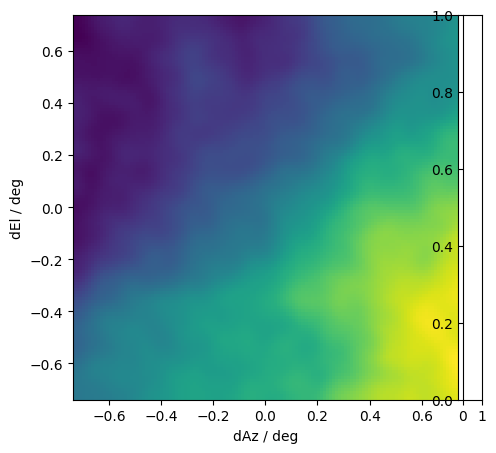

In [15]:
fig, ax = pt.subplots(1,1, figsize=(10, 5))

pwv_gauss = ax.pcolormesh(X, Y, PWV[0:ny])
ax.set_aspect(1)
ax.set_xlabel("dAz / deg")
ax.set_ylabel("dEl / deg")

divider0 = make_axes_locatable(ax)
cax0 = divider0.append_axes('right', size='5%', pad=0.05)

_tc = fig.colorbar(PWV, cax=cax0, orientation="vertical")
_tc.set_label("PWV / mm", rotation=270, labelpad=20)

#ax[0].scatter

pt.show()



Now, we apply the windspeed to our atmospheric screen. We record the results for a period of 20 seconds of observation. Here, we re-implement the windspeed framestepping in order to generate the animation. During regular usage, `TiEMPO2` does the stepping internally and implementing an own stepper is not necessary.

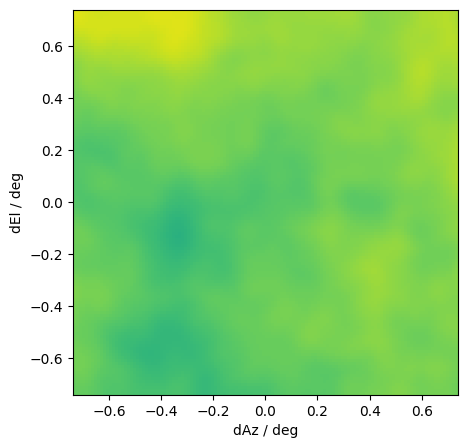

In [14]:
t_end = 200

N_cells_sec = pwvgrid / windspeed_ang # Nr. cells / sec
N_time = round(t_end / N_cells_sec)

t_range = np.linspace(0, t_end, num = N_time)

max_pt = np.max(PWV[:N_time,:])
min_pt = np.min(PWV[:N_time,:])

fig, ax = pt.subplots(1,1, figsize=(5, 5))
ims = []
for i in range(len(t_range)):
    ind_lo = i
    ind_hi = ny + i

    pwv_gauss = ax.pcolormesh(X, Y, PWV[ind_lo:ind_hi], vmin=min_pt, vmax=max_pt)
    ax.set_aspect(1)
    ax.set_xlabel("dAz / deg")
    ax.set_ylabel("dEl / deg")
    
    ims.append([pwv_gauss])
    

ani = animation.ArtistAnimation(fig, ims, interval=10, repeat_delay=0, blit=True)
HTML(ani.to_html5_video())

In [ ]:
pt.clf()
pt.cla()